In [257]:
%%html
<style>
    body {
        font-family: "Times New Roman", Times, serif; 
    }
</style>

### 1. What information would be the most important to "machine learn"? Can it be learned?
The important purpose is to predict the future suicide rate, and to determine the relationship between each feature and variations of predicted suicide rate. Understanding the factors that influence suicide rates is important. 

The features that are relavant to the dependent variables are important to "machine learn". They can provide meaningful values to build up the model. At the same time, unbiased, well-distributed features are important for generalizing the dataset and are representative. Most of the features are numerical or nominal that can be learned. 

### 2. Explain in detail how one should set up the problem. Would it be a regression or a classification problem? Is any unsupervised approach, to look for patterns, worthwhile? 

It would be a binary classification problem. The goal is to categorize each instance into one of the two classes: high suicide rate or low suicide rate. Unsupervised approach could also be worthwhile to identify patterns or clusters in the data without predefined labels. For example, K-means and PCA can be used to find the hidden clusters. Apply clustering algorithms like K-means clustering to identify groups of similar instances in the dataset. Comparing to the suicide rate, we can further interpret the classification. PCA may be used to reduce the dimensionality of the data, which can gain insights into the structure of the data.

### 3. What should be the dependent variable? 
The dependent variable should be a binary classification representing the level of suicide rate, high or low. This is relavant to the suicide rate or the suicides/100k pop in the dataset. 

We need to:
- Calculate the median suicide rate.
- Classify each instance based on whether its suicide rate is above or below the median.

### 4. Find some strong correlations between the independent variables and the dependent variable you decided and use them to rank the independent variables. 

In [258]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

filename = "master.csv"
df = pd.read_csv(filename)

df.rename(columns={"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
print(df['HDI_for_year'].isna().sum())
df["gdp_for_year"] = df["gdp_for_year"].str.replace(",","").astype(np.int64)
df["age"] = df["age"].str.replace("5-14 years","05-14 years")
df

19456


,country,year,sex,age,suicides_no,population,suicides_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,05-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,05-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z


- #### **Year**

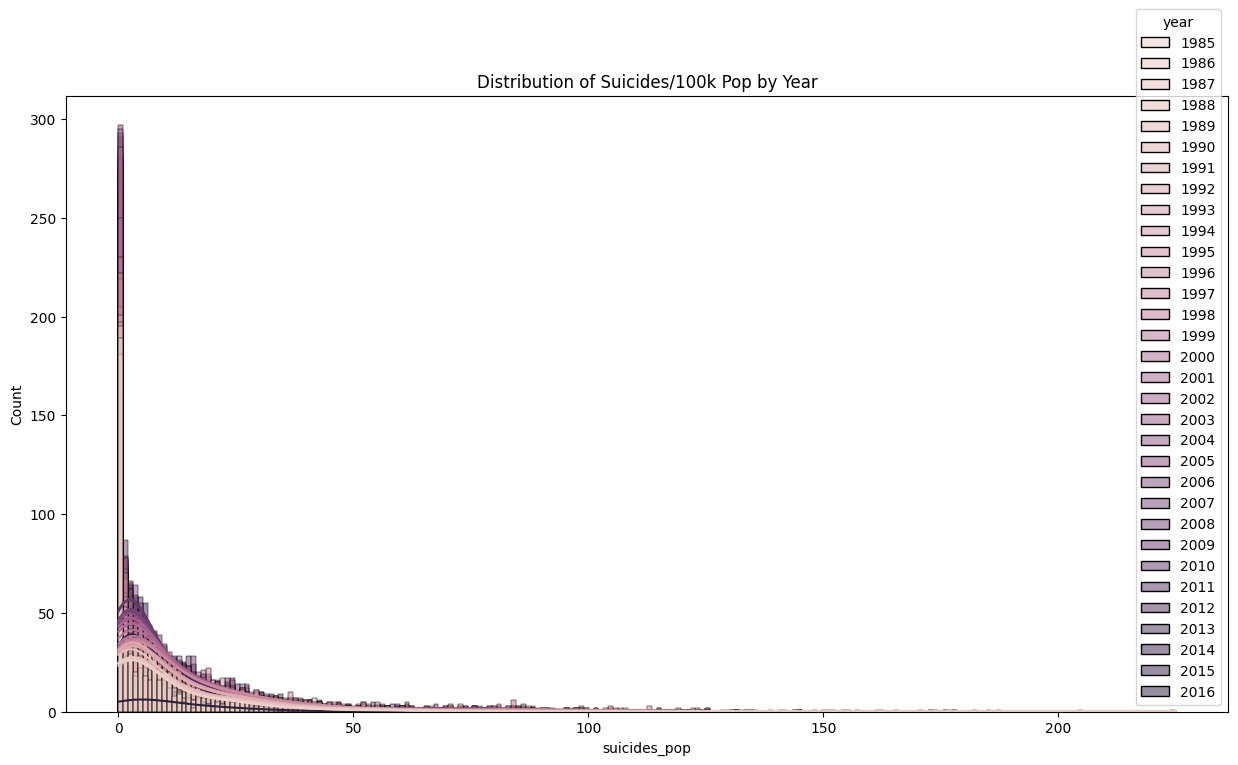

In [259]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x='suicides_pop', hue='year', kde=True)
plt.title('Distribution of Suicides/100k Pop by Year')
plt.show()

- #### **Country**
The ratio of suicide varies in different countries. It can be learned. The model can learn country patterns and factors contributing to suicide rates.

In [260]:
df.replace("Republic of Korea", "Korea, Republic of", inplace = True)
df.replace('Czech Republic', "Czechia", inplace = True)
df.replace('Macau', 'Macao', inplace = True)
df.replace('Saint Vincent and Grenadines', "Saint Vincent and the Grenadines", inplace = True)

df_suino = df.groupby(["country","year"])["suicides_no"].sum()
df_sum = df_suino.sort_index(ascending=True)[:] * 100

df_pop = df.groupby(["country","year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]

df_total = df_sum / df_pop_sum
df_total.head(10)

country  year
Albania  1987    0.002694
         1988    0.002279
         1989    0.002426
         1992    0.001665
         1993    0.002600
         1994    0.001755
         1995    0.003031
         1996    0.003027
         1997    0.005710
         1998    0.005112
dtype: float64

In [261]:
country_dict={}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]

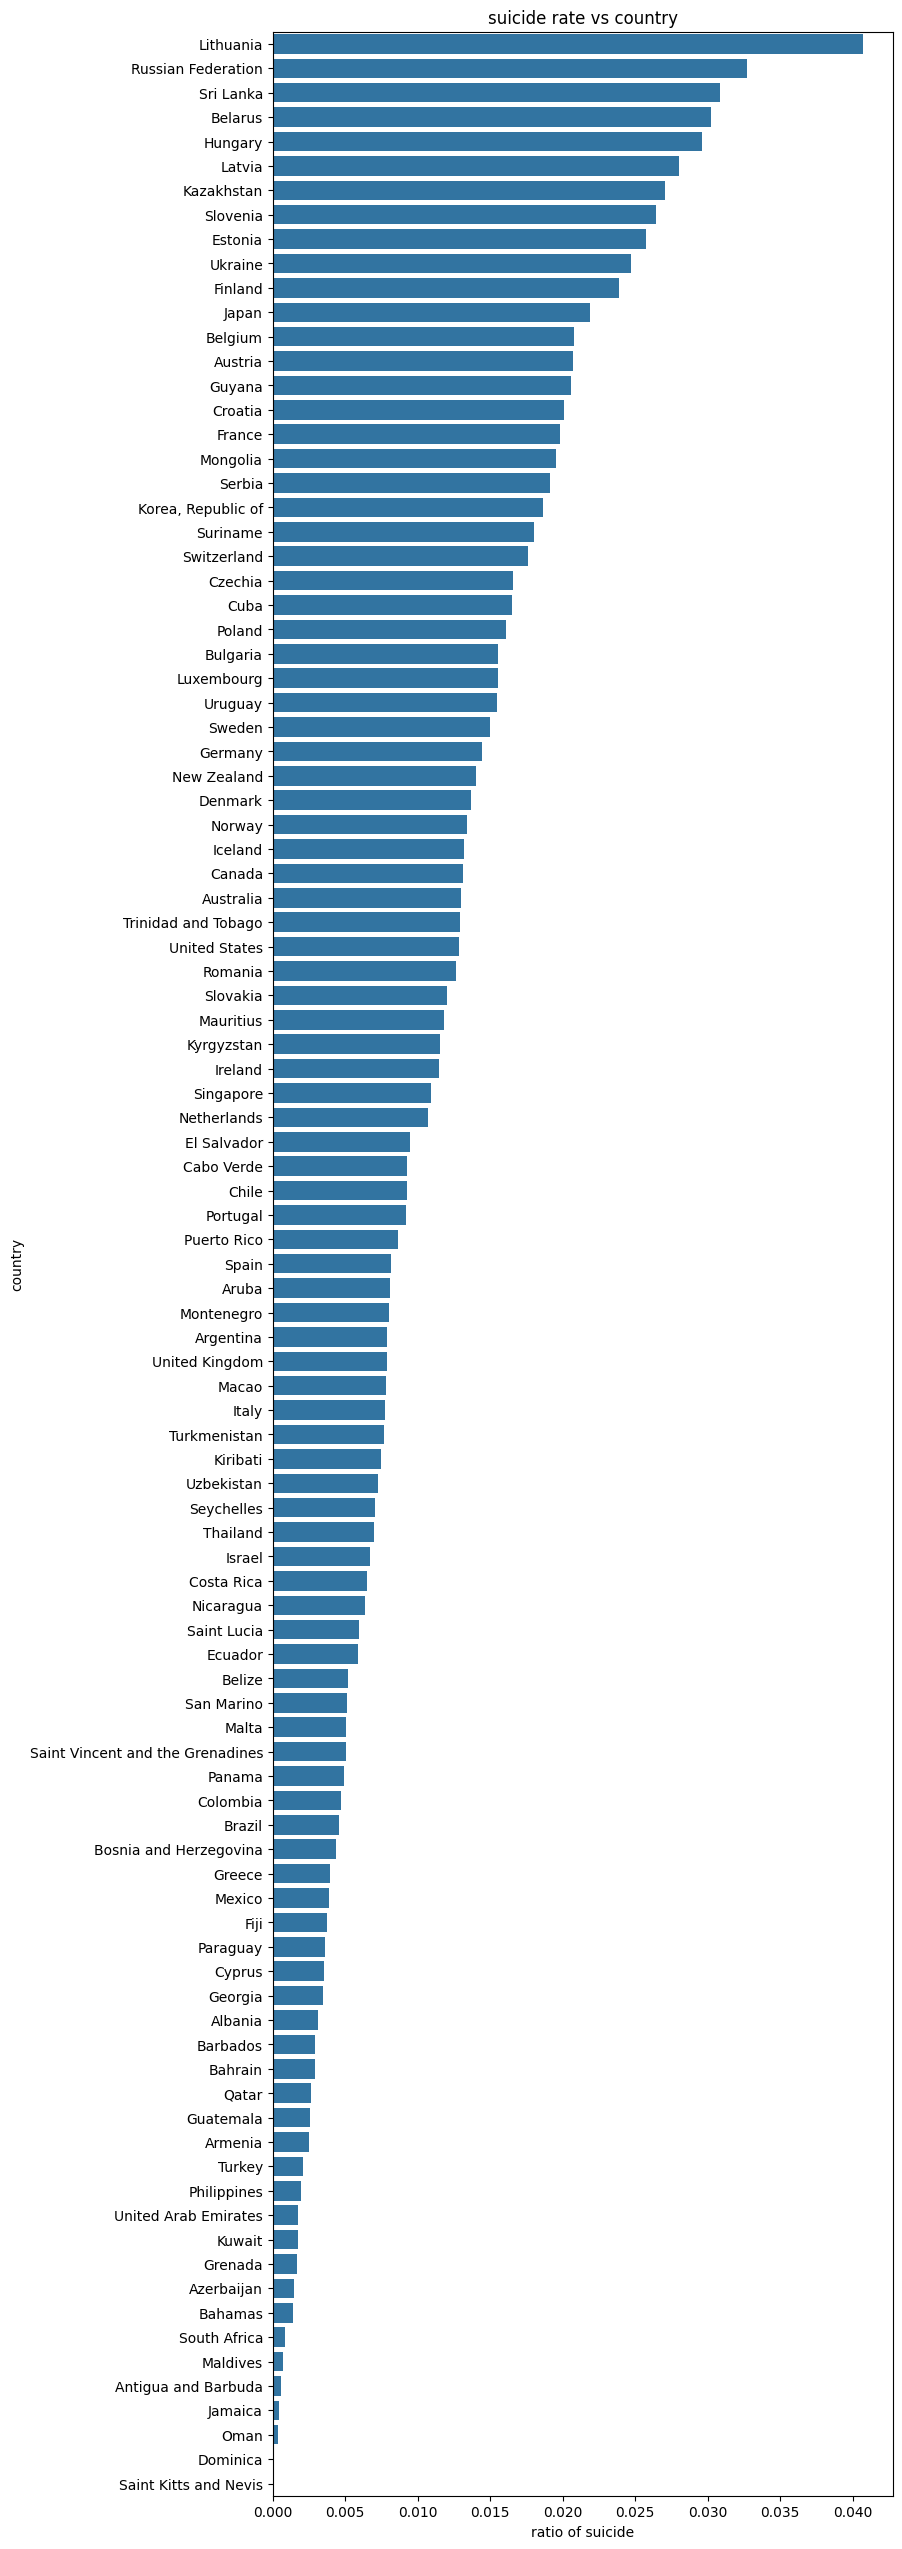

In [262]:
plt.figure(figsize=(8,32))
sns.barplot(x=country_suicide[:],y=country_list[:])
plt.xlabel("ratio of suicide")
plt.ylabel("country")
plt.title("suicide rate vs country")
plt.show()

- #### **Sex**
Let's see the performance of sex. There is significant change of number of suicides between male and female. It is numerical features and can be learned by model.

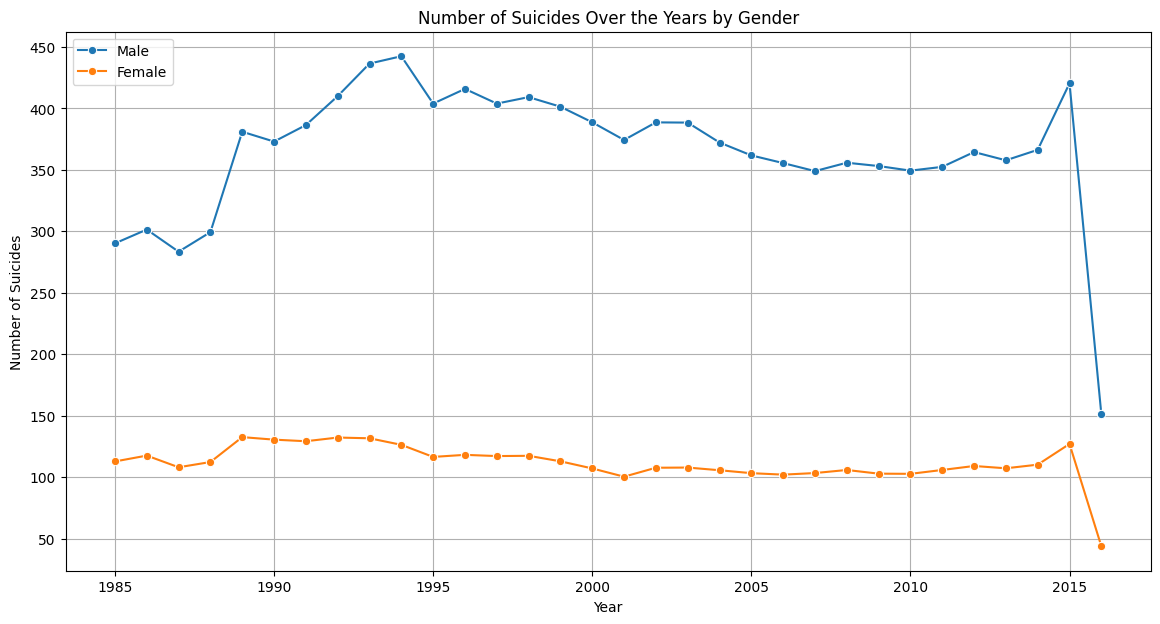

In [263]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_men, x='year', y='suicides_no', errorbar=None, label='Male', marker='o')
sns.lineplot(data=df_women, x='year', y='suicides_no', errorbar=None, label='Female', marker='o')

# Adding labels and legend
plt.title('Number of Suicides Over the Years by Gender')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.legend()
plt.grid(True)
plt.show()

- #### Age

The suicide rate is getting higher when the age is higher. Age is a factor of suicide. It is categories and can be learned by model. 

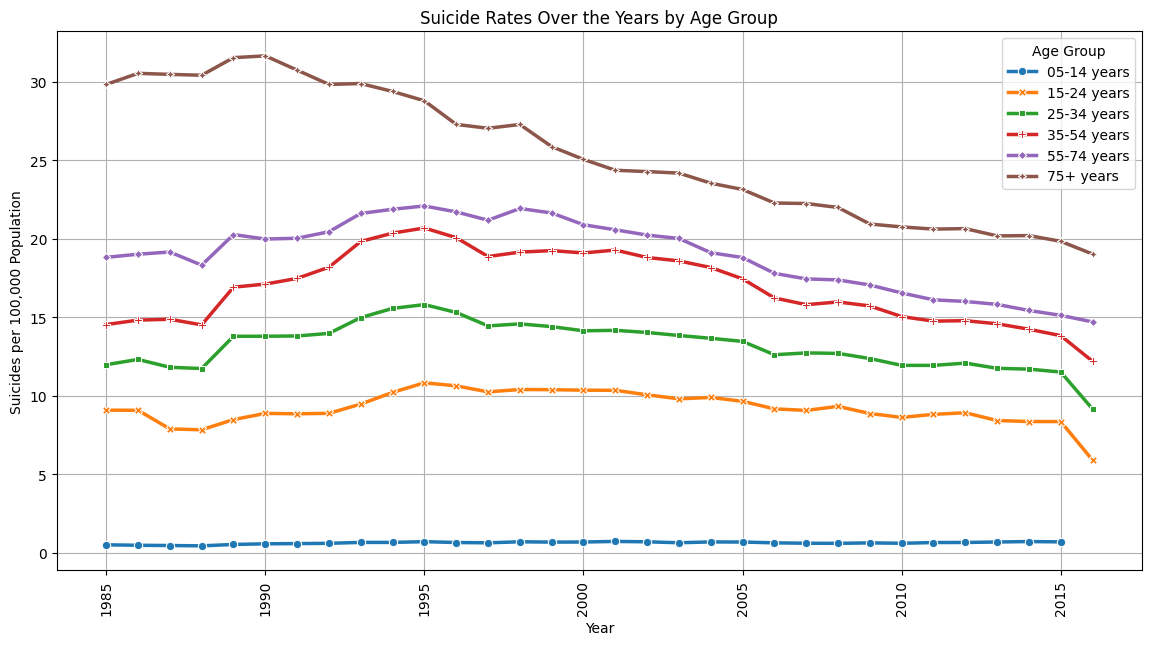

In [264]:
df_age = df.groupby(["year", "age"])[["suicides_no", "population"]].sum()

df_reset = df_age.reset_index()

df_reset['suicides_per_100k'] = df_reset['suicides_no'] * 100000 / df_reset['population']

# Plot the suicide rates over the years for different age groups
plt.figure(figsize=(14, 7))
sns.lineplot(x="year", y="suicides_per_100k", hue="age", data=df_reset, linewidth=2.5, style="age", markers=True, dashes=False)

plt.title('Suicide Rates Over the Years by Age Group')
plt.xlabel('Year')
plt.ylabel('Suicides per 100,000 Population')
plt.xticks(rotation=90)
plt.legend(title='Age Group')
plt.grid(True)

# Show the plot
plt.show()

In [265]:
suicide_df_dropped = df.drop(columns=['country','country-year', 'generation'], axis=1)
suicide_df_encoded = pd.get_dummies(suicide_df_dropped, columns=['sex', 'age'])
suicide_df_encoded
suicide_corr = suicide_df_encoded.corr()
suicide_corr['suicides_pop']
correlations_with_suicides_pop = suicide_corr['suicides_pop'].sort_values(ascending=False)
correlations_with_suicides_pop

suicides_pop       1.000000
sex_male           0.391496
suicides_no        0.306604
age_75+ years      0.262910
age_55-74 years    0.078819
HDI_for_year       0.074279
age_35-54 years    0.050304
gdp_for_year       0.025240
population         0.008285
gdp_per_capita     0.001785
age_25-34 years   -0.014851
year              -0.039037
age_15-24 years   -0.091315
age_05-14 years   -0.286660
sex_female        -0.391496
Name: suicides_pop, dtype: float64

Thus, rank of chosen important features:
- sex, age, year, country, gdp_for_year



### 5. Pre-process the dataset and list the major features you want to use. 
We first pre-processing the data. Cnsidering HDI_for_year contains 19456/27820, we can drop this column. 

The major features chosen are 
- sex
- age
- year
- country
- gdp_for_year**.

In [266]:
median_suicide_rate = df['suicides_pop'].median()
df['suicide_rate_binary'] = df['suicides_pop'].apply(lambda x: 'high' if x > median_suicide_rate else 'low')
select_df=df.drop(columns=['HDI_for_year','suicides_pop', 'suicides_no', 'country-year','generation','gdp_per_capita','population'])
select_df

,country,year,sex,age,gdp_for_year,suicide_rate_binary
0,Albania,1987,male,15-24 years,2156624900,high
1,Albania,1987,male,35-54 years,2156624900,low
2,Albania,1987,female,15-24 years,2156624900,low
3,Albania,1987,male,75+ years,2156624900,low
4,Albania,1987,male,25-34 years,2156624900,low
...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,63067077179,low
27816,Uzbekistan,2014,female,75+ years,63067077179,low
27817,Uzbekistan,2014,male,05-14 years,63067077179,low
27818,Uzbekistan,2014,female,05-14 years,63067077179,low


In [267]:
select_df = pd.get_dummies(select_df, columns=['sex', 'age','country'])
select_df

,year,gdp_for_year,suicide_rate_binary,sex_female,sex_male,age_05-14 years,age_15-24 years,age_25-34 years,age_35-54 years,age_55-74 years,...,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan
0,1987,2156624900,high,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1987,2156624900,low,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1987,2156624900,low,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1987,2156624900,low,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1987,2156624900,low,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,2014,63067077179,low,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
27816,2014,63067077179,low,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
27817,2014,63067077179,low,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
27818,2014,63067077179,low,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


### 6. Devise a classification problem and present a working prototype model. 


In [268]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = select_df.drop(columns=['suicide_rate_binary'])
y = select_df['suicide_rate_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8927630002396357
Classification Report:
               precision    recall  f1-score   support

        high       0.88      0.91      0.89      4172
         low       0.90      0.88      0.89      4174

    accuracy                           0.89      8346
   macro avg       0.89      0.89      0.89      8346
weighted avg       0.89      0.89      0.89      8346



The overall accuracy is 0.89, showing a good performance. The F1-scores are balanced and high, indicating a good balance between precision and recall.